In [1]:
# generic libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from concurrent.futures import ProcessPoolExecutor

# project specific custom libraries
from config import *
from simulation import simulate_decay_times
from analysis import binned_maximum_likelihood_fit, pull

In [2]:
#set a seed for numpys random number generator
np.random.seed(42)

In [3]:
# Exercise part 3 Simple simulation

# Part 0, generate the plot from the N function
t_bounds = [0, 2e-5]
n = 10000

t_space = np.linspace(t_bounds[0], t_bounds[1], n)
t_computed_values = N(t_space, n)

# Part 1, simulate n decay times and create a histogram plot
simulated_decay_points = simulate_decay_times(n, t_bounds[1])

# create the histogram
counts, bins = np.histogram(simulated_decay_points[:, 0] , bins=25)
plt.hist(bins[:-1], bins, weights=counts, color='lightgray', edgecolor='black')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {n} simulated decay times')
plt.savefig('../Documentation/images/simulated_decay_histogram.png', dpi=750)
plt.close()

muon_estimate, muon_uncertainty, muon_pull, pion_estimate, pion_uncertainty, pion_pull = binned_maximum_likelihood_fit(counts, bins)


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [ ]:
# part c
"""
Repeat the simulation 100 times and produce histrograms with the 100 values of the mean lifetimes
that we obtain. Determine the standard deviations of the two distributions
"""

muon_estimates = []
pion_estimates = []

number_of_simulations = 100
for i in range(number_of_simulations):
    print(f"Simulation {i+1}/{number_of_simulations}")
    simulated_decay_points = simulate_decay_times(n, t_bounds[1])
    counts, bins = np.histogram(simulated_decay_points[:, 0] , bins=25)
    muon_estimate, muon_uncertainty, muon_pull, pion_estimate, pion_uncertainty, pion_pull = binned_maximum_likelihood_fit(counts, bins)
    muon_estimates.append(muon_estimate)
    pion_estimates.append(pion_estimate)
    
    
plt.hist(muon_estimates, bins=25)
plt.show()

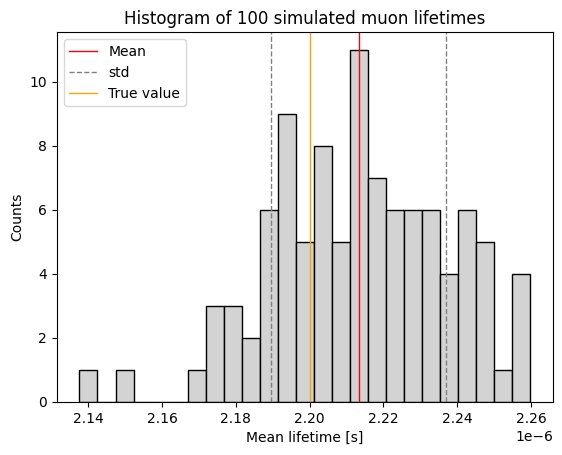

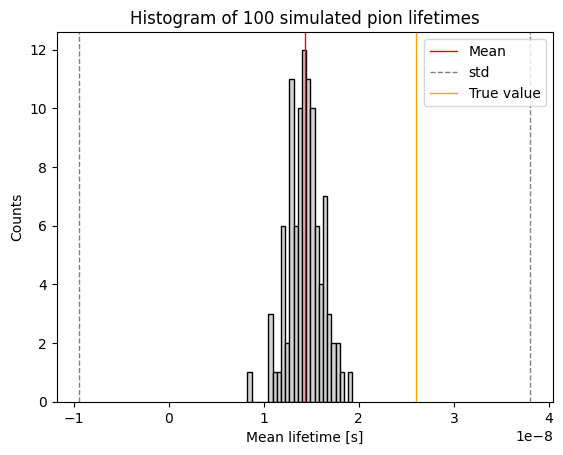

In [ ]:
# do the evaluation for the muon
mean_pion_estimate = np.mean(pion_estimates)
std_pion_estimate = np.std(pion_estimates)

mean_muon_estimate = np.mean(muon_estimates)
std_muon_estimate = np.std(muon_estimates)


plt.hist(pion_estimates, bins=25, color='lightgray', edgecolor='black')
plt.axvline(mean_pion_estimate, color='red', linewidth=1, label='Mean')
plt.axvline(mean_pion_estimate + std_pion_estimate, color='gray', linestyle='dashed', linewidth=1, label='std')
plt.axvline(mean_pion_estimate - std_pion_estimate, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(MUON_MEAN_LIFETIME, color='orange', label='True value', linewidth=1)
plt.legend()
plt.xlabel('Mean lifetime [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {number_of_simulations} simulated muon lifetimes')
plt.savefig('../Documentation/images/muon_simulation.png', dpi=750)
plt.show()



plt.hist(muon_estimates, bins=25, color='lightgray', edgecolor='black')
plt.axvline(mean_muon_estimate, color='red', linewidth=1, label='Mean')
plt.axvline(mean_muon_estimate + std_muon_estimate, color='gray', linestyle='dashed', linewidth=1, label='std')
plt.axvline(mean_muon_estimate - std_muon_estimate, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(PION_MEAN_LIFETIME, color='orange', label='True value', linewidth=1)
plt.legend()
plt.xlabel('Mean lifetime [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {number_of_simulations} simulated pion lifetimes')
plt.savefig('../Documentation/images/pion_simulation.png', dpi=750)
plt.show()

